In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder #Encodes categorical columns by converting unique values into one-hot encoded columns.

# Takes a list of Python dictionaries (e.g. [{feature1: value1, feature2: value2}, {...}]) and converts them into a numeric feature matrix.
from sklearn.feature_extraction import DictVectorizer

In [5]:
# categorical data
data =  [
 {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
 {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
 {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
 {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
 ]

df = pd.DataFrame(data)
print(f"Neighbourhood data : \n{df}")

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
# display(categorical_columns)
encoder = OneHotEncoder(sparse_output=False, dtype=int)

one_hot_encoded = encoder.fit_transform(df[categorical_columns])
# display(one_hot_encoded)

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([df, one_hot_df], axis=1)

df_encoded = df_encoded.drop(categorical_columns, axis=1)
print(f"Encoded Neighbourhood data : \n{df_encoded}")

Neighbourhood data : 
    price  rooms neighborhood
0  850000      4   Queen Anne
1  700000      3      Fremont
2  650000      3  Wallingford
3  600000      2      Fremont
Encoded Neighbourhood data : 
    price  rooms  neighborhood_Fremont  neighborhood_Queen Anne  \
0  850000      4                     0                        1   
1  700000      3                     1                        0   
2  650000      3                     0                        0   
3  600000      2                     1                        0   

   neighborhood_Wallingford  
0                         0  
1                         0  
2                         1  
3                         0  


In [6]:
# using DictVectorizer to transform the categorical data to feature matrix
vec = DictVectorizer(dtype=int, sparse=False)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [7]:
# to see the meaning of the column you can inspect the feature names
vec.get_feature_names_out()

array(['neighborhood=Fremont', 'neighborhood=Queen Anne',
       'neighborhood=Wallingford', 'price', 'rooms'], dtype=object)

In [8]:
# Another common featue of feature engineering is converting text to numerical values
data = [
    'problem of evil',
    'problem of free will',
    'evil queen'
    'horizon problem'
]

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X = vect.fit_transform(data)

In [9]:
pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())

,evil,free,of,problem,queenhorizon,will
0,1,0,1,1,0,0
1,0,1,1,1,0,1
2,1,0,0,1,1,0


In [10]:
# using TF-IDF to convert text to numerical values
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data)
pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

,evil,free,of,problem,queenhorizon,will
0,0.619805,0.000000,0.619805,0.481334,0.000000,0.000000
1,0.000000,0.584483,0.444514,0.345205,0.000000,0.584483
2,0.547832,0.000000,0.000000,0.425441,0.720333,0.000000


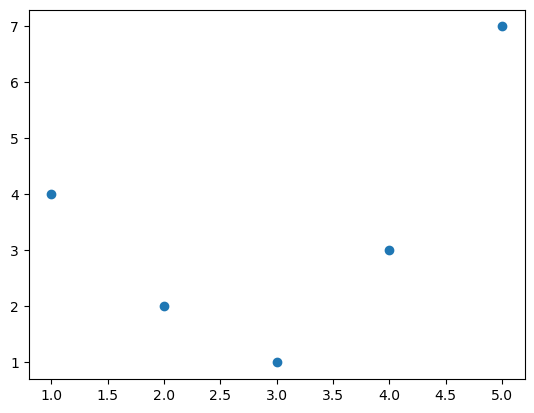

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);
plt.show()

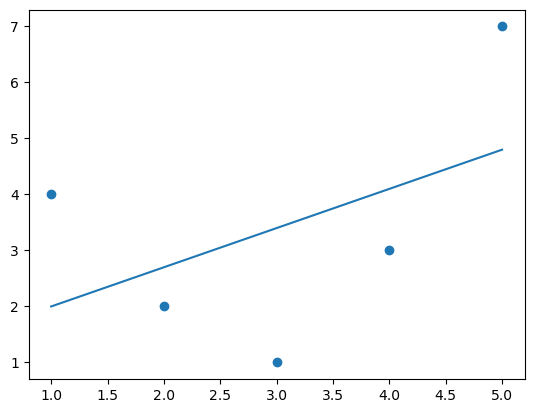

In [14]:
#let use Linear regression to fit a line to the data
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]  # Reshape x to be a 2D array
model = LinearRegression()
y_pred = model.fit(X, y).predict(X)

plt.scatter(x, y)
plt.plot(X, y_pred)
plt.show()

In [16]:
# Lineae regression does not fit well to this data, so let's use polynomial regression
# this will add extra columns features to drive felxibility to the model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

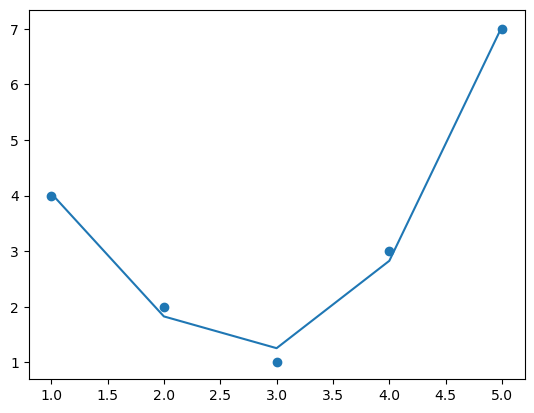

In [17]:
model = LinearRegression()
y_poly_pred = model.fit(X_poly, y).predict(X_poly)
plt.scatter(x, y)
plt.plot(X, y_poly_pred)
plt.show()

In [32]:
# imputation of missing values
from sklearn.impute import SimpleImputer

data = [
    [1, 2, np.nan],
    [3, np.nan, 4],
    [np.nan, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
]
data = np.array(data)

imputer = SimpleImputer(strategy='mean')  # You can also use 'median', 'most_frequent', etc.
imputer_data = imputer.fit_transform(data)
imputer_data

X2 = imputer_data
y = np.array([1, 2, 3, 4, 5])  # Example target variable

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
y2_pred = model.fit(X2, y).predict(X2)
y2_pred

array([1.02040222, 2.02768872, 3.05537744, 3.78650539, 5.11002623])

ValueError: x and y must be the same size